In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Bharath Setty\Desktop\Sriraksha\Data Science\2. Careerera  - DS Course\Datasets - for EDA - class given\Other Datasets\Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA

In [4]:
# all_numerical_features = ['area','bedrooms','bathrooms','stories','parking']

# all_categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

# target_feature = ['price']

# since the target features is numerical - we must apply REGRESSION model


#### A. Pie Charts

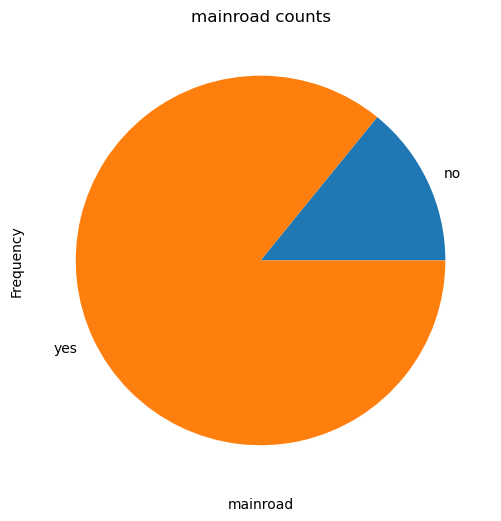

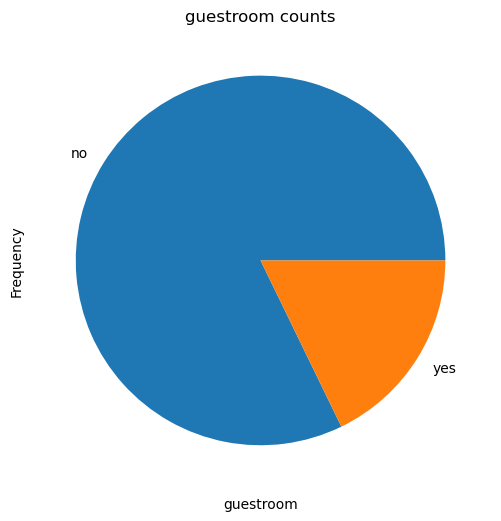

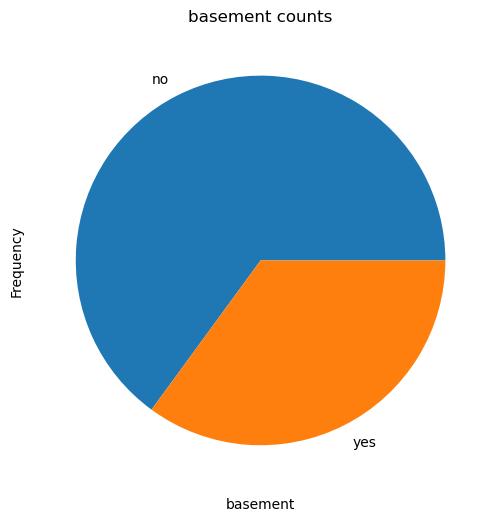

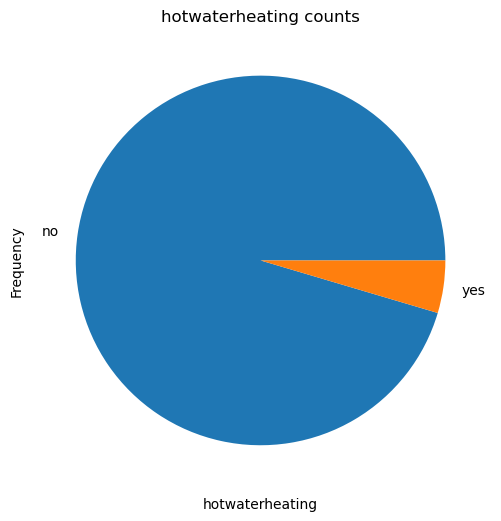

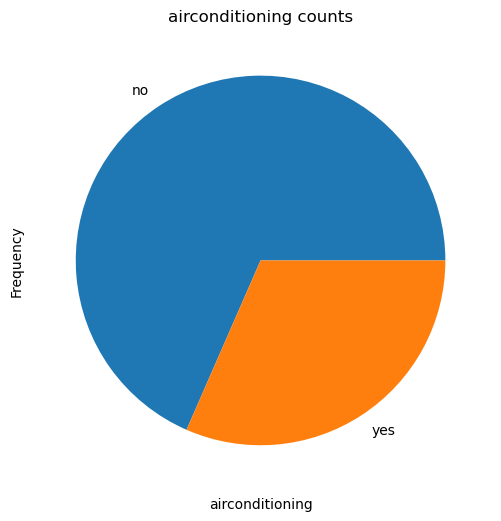

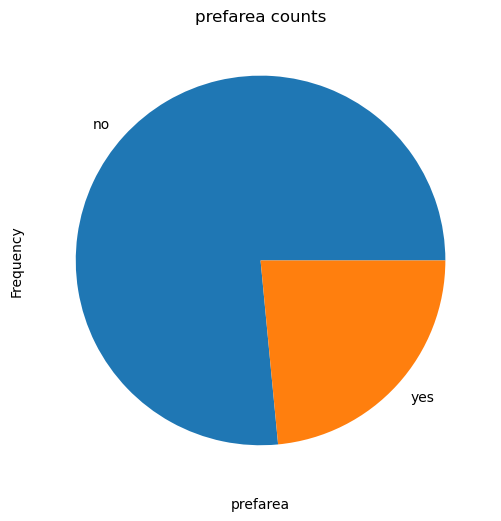

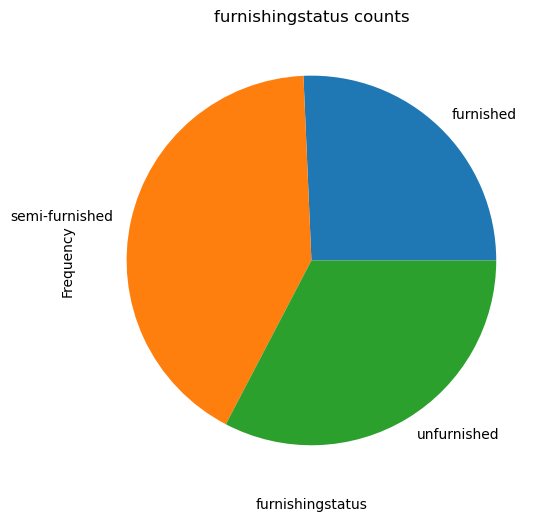

In [5]:
from matplotlib import pyplot as plt
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.pie(ax = ax)
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


#### B. Description

In [6]:
numerical_features = ['area','bedrooms','bathrooms','stories','parking']

categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

# target_feature = price(numerical)

In [7]:
num_feature = ['area','bedrooms','bathrooms','stories','parking','price']
df[num_feature].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


INFERENCE :

We can see all the min and max values of all the features along with the quartiles, mean & std deviation.

#### C.Boxplots

Text(0.5, 1.0, 'price')

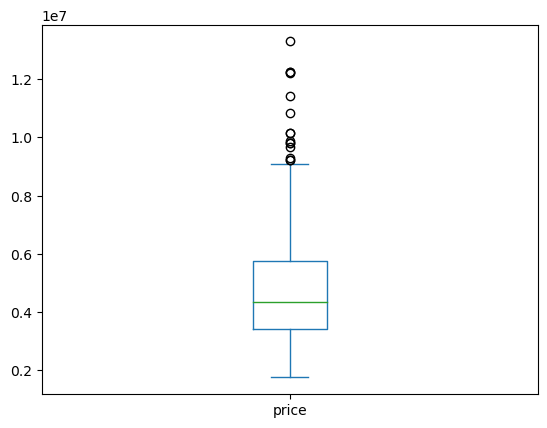

In [8]:
df['price'].plot(kind='box')
ax.set_title('price')

#### D.Correlation & Scatter Plots

In [9]:
df[numerical_features + ['price']].corr()

,area,bedrooms,bathrooms,stories,parking,price
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.535997
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.366494
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.517545
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.420712
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.384394
price,0.535997,0.366494,0.517545,0.420712,0.384394,1.000000


In [10]:
print("Area vs price:",df['area'].corr(df['price']))
print("bedrooms vs price:",df['bedrooms'].corr(df['price']))
print("bathrooms vs price:",df['bathrooms'].corr(df['price']))
print("stories vs price:",df['stories'].corr(df['price']))
print("parking vs price:",df['parking'].corr(df['price']))
          

Area vs price: 0.5359973457780797
bedrooms vs price: 0.36649402577386875
bathrooms vs price: 0.5175453394550112
stories vs price: 0.42071236618861657
parking vs price: 0.38439364863572595


INFERENCE :

 - The above 5 variables seems to be positively related with 'price'.

Text(0.5, 1.0, 'Price vs Area-correlation:0.54')

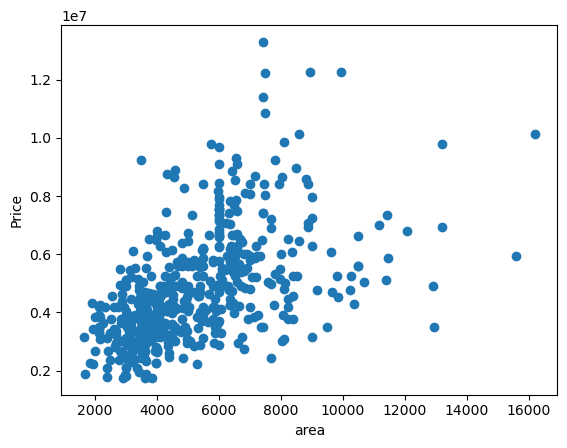

In [11]:
correlation = round(df['area'].corr(df['price']),2)
plt.scatter(x=df['area'], y=df['price'])
plt.xlabel('area')
plt.ylabel('Price')
ax.set_title('Price vs Area' + '-correlation:' + str(correlation))

#### E.Histogram & Distribution Plot

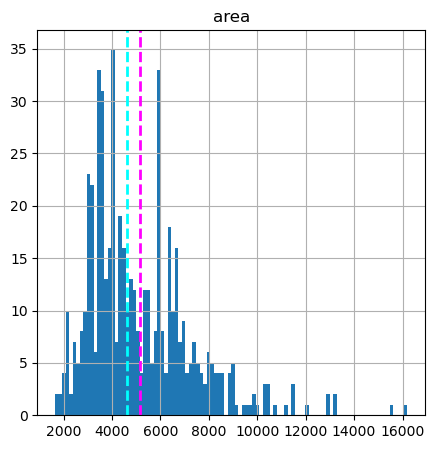

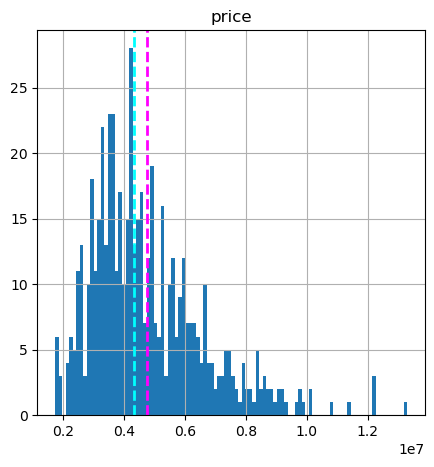

In [12]:
num_feature = ['area','price']
for col in num_feature:                                                          # using for loop on numerical data columns
    fig = plt.figure(figsize=(5,5))                                                   # setting size of the figure : using matlop package imported above, I am creating an object 'fig' for the 'plt' class & passing my figure size,so this figsize is controlling the size of the figure (ex:you may change is to 6,3 & look-the size of the figure changes) 
    ax = fig.gca()                                                                    # get current axis, into my object 'fig' there is a function called '.gca' - I am storing 'get current axis' in a variable called 'ax'(axis variable-generally we store in ax) - gca is basically checking whichever slot/space is available & making available the next slot (ex: 2nd time it runs, after first graph is printed it will make space for the next graph) 
    feature = df[col]                                                          # just using a variable
    feature.hist(bins=100, ax = ax)                                                   # I am creating my histogram & giving the bins value(amount of seperation you want between one plot), first ax is a parameter that my histogram is expecting & for that I am giving my ax(current axis)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)      # line showing mean : for drawing line I am using a function called 'ax.axvline' on the axis, current axis.axis of vertical line (I am drawing a vertical line); specify - color, linestyle, linewidth as needed
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)       # line showing median
    ax.set_title(col)                                                                 # setting title for current axis (col) - so first time it is temp,second it is atemp, third it is hum & fourth windspeed
plt.show()                                                                            # to showcase the final plot, all the axis available at once


C:\Users\Bharath Setty\AppData\Local\Temp\ipykernel_12228\1236610693.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

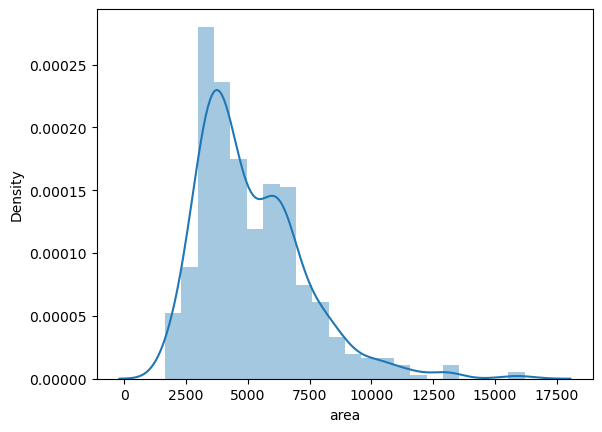

In [13]:
import seaborn as sns

sns.distplot(df['area'])

C:\Users\Bharath Setty\AppData\Local\Temp\ipykernel_12228\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

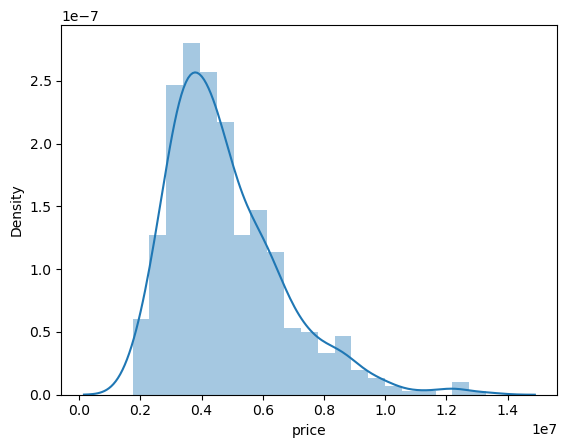

In [14]:
sns.distplot(df['price'])

### ENCODING

In [15]:
# mainroad(encode), guestroom(encode), basement (encode), hotwaterheating(encode), airconditioning (encode), prefarea(encode), furnishingstatus (encode)

In [16]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [17]:
df['mainroad'] = df['mainroad'].map({'yes':0,'no':1})

In [18]:
df['guestroom'] = df['guestroom'].map({'yes':0,'no':1})

In [19]:
df['basement'] = df['basement'].map({'yes':0,'no':1})

In [20]:
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':0,'no':1})

In [21]:
df['airconditioning'] = df['airconditioning'].map({'yes':0,'no':1})

In [22]:
df['prefarea'] = df['prefarea'].map({'yes':0,'no':1})

In [23]:
df['furnishingstatus'] = df['furnishingstatus'].map({'semi-furnished':0,'unfurnished':1,'furnished':2})

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,2
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,2
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,2
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,2


### NORMALIZATION

In [25]:
# area (normalize), bedrooms (normalize), bathrooms (normalize), stories (normalize), parking(normalize)

In [26]:
from sklearn.preprocessing import MinMaxScaler

df[['area','bedrooms','bathrooms','stories','parking']] = MinMaxScaler().fit_transform(df[['area','bedrooms','bathrooms','stories','parking']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,0,1,1,1,0,0.666667,0,2
1,12250000,0.502405,0.6,1.000000,1.000000,0,1,1,1,0,1.000000,1,2
2,12250000,0.571134,0.4,0.333333,0.333333,0,1,0,1,1,0.666667,0,0
3,12215000,0.402062,0.6,0.333333,0.333333,0,1,0,1,0,1.000000,0,2
4,11410000,0.396564,0.6,0.000000,0.333333,0,0,0,1,0,0.666667,1,2


### MISSING VALUES

In [27]:
df.isnull().values.any()

False

In [28]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [29]:
# Checking for objects

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 55.5 KB


In [30]:
# Converting DATA into a NUMPY ARRAY

features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','area','bedrooms','bathrooms','stories','parking']

X = df[features].values
y = df['price'].values


In [31]:
X

array([[0.        , 1.        , 1.        , ..., 0.33333333, 0.66666667,
        0.66666667],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.33333333,
        0.66666667],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.33333333,
        0.        ]])

In [32]:
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [33]:
# Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 18)


In [34]:
# Importing the models

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
        

In [35]:
model_lin = LinearRegression().fit(X_train, y_train)
model_ran2 = RandomForestRegressor().fit(X_train, y_train)
model_dt2 = DecisionTreeRegressor().fit(X_train, y_train)
model_xg2 = xgb.XGBRegressor().fit(X_train, y_train)

In [36]:
print(model_lin)
print(model_ran2)
print(model_dt2)
print(model_xg2)

LinearRegression()
RandomForestRegressor()
DecisionTreeRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [37]:
import numpy as np

y_pred_lin = model_lin.predict(X_test)

In [38]:
# For linear regression model, 

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_lin)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred_lin)
print('R2:', r2)



MSE: 1546611805685.9634
RMSE: 1243628.4837868435
R2: 0.6676468690259204


In [39]:
# now the model is trained, let me check the accuracy of the linear regression model

predictions_train = model_lin.predict(X_train)
predictions_test = model_lin.predict(X_test)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print('R2 for Linear Regression training:', round(r2_train,2))
print('R2 for Linear Regression testing:', round(r2_test,2))
     
# print('Error for Linear Regression training:', round(1-r2_train,2))
# print('Error for Linear Regression testing:', round(1-r2_test,2))


R2 for Linear Regression training: 0.65
R2 for Linear Regression testing: 0.67


'Best Fitting Model' (LB & LV)

In [40]:
# checking accuracy of decision tree model

predictions_train = model_dt2.predict(X_train)
predictions_test = model_dt2.predict(X_test)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print('R2 for Decision Tree training:', round(r2_train,2))
print('R2 for Decision Tree testing:', round(r2_test,2))
     
# print('Error for Decision Tree training:', round(1-r2_train,2))
# print('Error for Decision Tree testing:', round(1-r2_test,2))


R2 for Decision Tree training: 1.0
R2 for Decision Tree testing: 0.19


'Overfitting Model' (LB & HV)

In [41]:
predictions_train = model_ran2.predict(X_train)
predictions_test = model_ran2.predict(X_test)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print('R2 for Bagging Random Forest training:', round(r2_train,2))
print('R2 for Bagging Random Forest testing:', round(r2_test,2))
     
# print('Error for Bagging Random Forest training:', round(1-r2_train,2))
# print('Error for Bagging Random Forest testing:', round(1-r2_test,2))


R2 for Bagging Random Forest training: 0.94
R2 for Bagging Random Forest testing: 0.65


'Best Fitting Model' (LB & LV)

In [42]:
# checking accuracy of XgBoost model

predictions_train = model_xg2.predict(X_train)
predictions_test = model_xg2.predict(X_test)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print('R2 for XGBOOST  training:', round(r2_train,2))
print('R2 for XGBOOST testing:', round(r2_test,2))
     
# print('Error for XGBOOST training:', round(1-r2_train,2))
# print('Error for XGBOOST testing:', round(1-r2_test,2))

R2 for XGBOOST  training: 1.0
R2 for XGBOOST testing: 0.61


'Best fitting model' (LV & LB)

INFERENCE :

- Linear regression best fit model is obtained with an accuracy of 67%